In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.optimize import brentq
from scipy.optimize import minimize_scalar
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import interpolate
from scipy.interpolate import UnivariateSpline
from fermipy import utils

# 1- Lendo os arquivos

In [2]:
lista_lnl_14_years = glob.glob('New_cross_and_loglikes_files/Upper_limits_14years_P8R2/lnl_*')
lista_lnl_6_years = glob.glob('New_cross_and_loglikes_files/Upper_limits_6years_P8R2/lnl_*')
lista_de_nomes = ['Bootes','Canes_Venatici_II','Carina','Coma_Berenices','Draco',
                  'Fornax','Hercules','Leo_II','Leo_IV','Sculptor','Segue_I','Sextans',
                  'Ursa_Major_II','Ursa_Minor','Willma_1']  

In [3]:
galaxias = {}
for i in range(len(lista_lnl_14_years)):
    galaxias[lista_de_nomes[i]] = np.loadtxt(lista_lnl_14_years[i])

In [4]:
galaxias_6years = {}
for i in range(len(lista_lnl_6_years)):
    galaxias_6years[lista_de_nomes[i]] = np.loadtxt(lista_lnl_6_years[i])

In [5]:
Matriz_valores = np.zeros((21,7000))

In [6]:
Matriz_valores_6years = np.zeros((21,7000))

In [7]:
for names in lista_de_nomes:
    aux = galaxias[names]
    Matriz_valores+=aux
    

In [8]:
for names in lista_de_nomes:
    aux = galaxias_6years[names]
    Matriz_valores_6years+=aux
    

In [9]:
crossesctions = np.loadtxt('limits_bb.txt',unpack=True)
mass = crossesctions[0]
sigma_ul_fermi_joint= np.zeros(len(mass))
sigma_ul_fermi_joint_14_years= np.zeros(len(mass))
#sigmav_6years = np.loadtxt('crossection_scan')
#sigmav_14years = np.loadtxt('My_crossections_14_anos/crossection_scan_Ursa')
crossections_scan = np.loadtxt('crossection_scan_P8R3')
crossections_scan_new = np.loadtxt('crossection_scan')
#joint_data = crossesctions[46]

In [15]:
for i in range(len(mass)):
    sigma_ul_fermi_joint_14_years[i] = utils.get_parameter_limits(crossections_scan_new[i],Matriz_valores[i])['ul']

In [16]:
for i in range(len(mass)):
    sigma_ul_fermi_joint[i] = utils.get_parameter_limits(crossections_scan_new[i],Matriz_valores_6years[i])['ul']

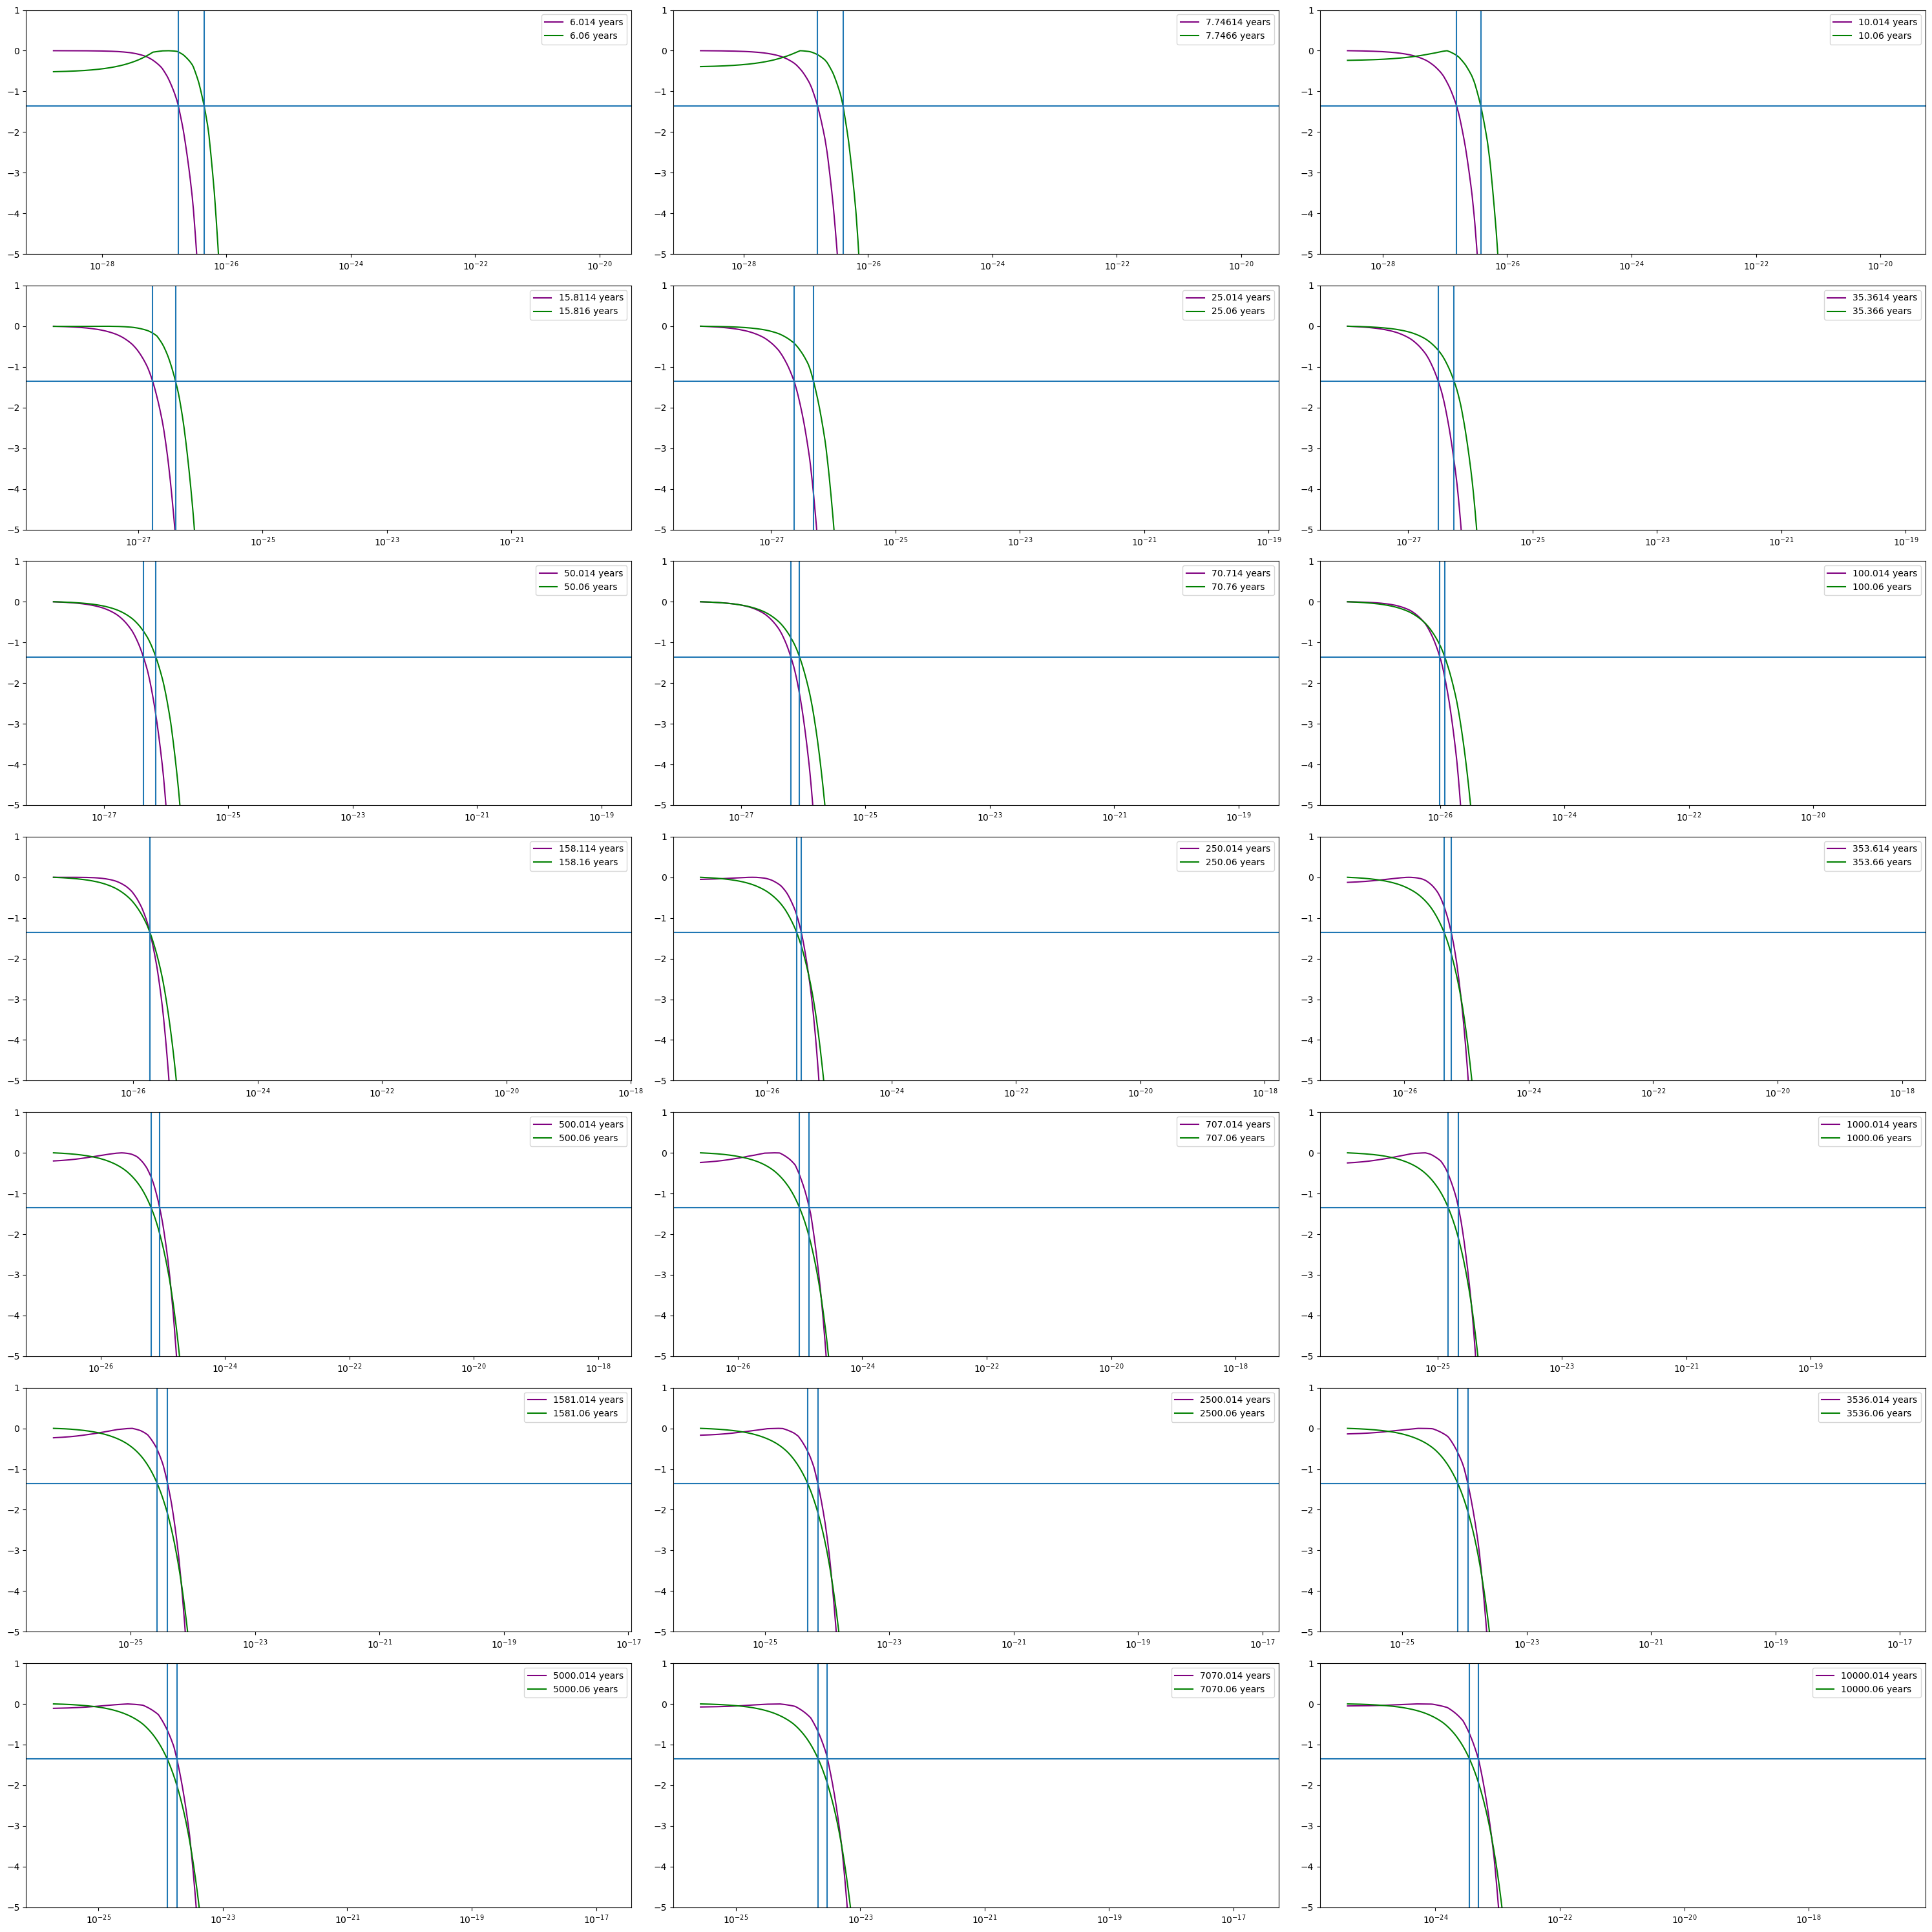

In [25]:
plt.figure(figsize=(30, 30))
for i in range(len(crossections_scan)):
    ax = plt.subplot(7,3,i+1)
    plt.plot(crossections_scan_new[i],Matriz_valores[i]-Matriz_valores[i].max(), color ='purple', label = f"{mass[i]}"+ '14 years')
    plt.plot(crossections_scan_new[i],Matriz_valores_6years[i]-Matriz_valores_6years[i].max(), color ='green', label = f"{mass[i]}"+ '6 years')
    plt.gca().set_ylim(-5,1)
    plt.xscale('log')
    plt.gca().axvline(sigma_ul_fermi_joint_14_years[i])
    plt.gca().axvline(sigma_ul_fermi_joint[i])
    plt.gca().axhline(-2.71/2)
    plt.legend()
plt.tight_layout() 


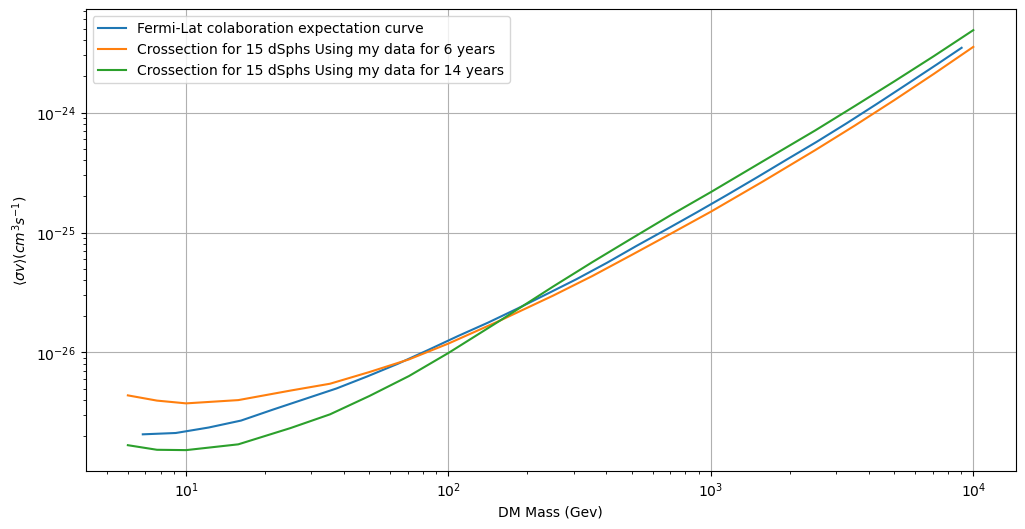

In [21]:
plt.rcParams['text.usetex'] = False
fig = plt.figure(figsize=(12,6))

plt.plot(massa_fermi,crossection_fermi_No_uncertanity, label = 'Fermi-Lat colaboration expectation curve')
plt.plot(mass,sigma_ul_fermi_joint, label = 'Crossection for 15 dSphs Using my data for 6 years')
plt.plot(mass,sigma_ul_fermi_joint_14_years, label = 'Crossection for 15 dSphs Using my data for 14 years')
#plt.plot(mass,Joint_fermi_data,label =' Crossection for 15 dSphs with  Fermi data')
#plt.plot(mass,Crossection_bootes, label ='Bootes',alpha=0.3)
#plt.plot(mass,Crossection_canes, label ='Canes',alpha=0.3)
#plt.plot(mass,Crossection_carina, label ='Carina',alpha=0.3)
#plt.plot(mass,Crossection_coma, label ='Coma Berenices',alpha=0.3)
#plt.plot(mass,Crossection_draco, label = 'Draco ',alpha=0.3)
#plt.plot(mass,Crossection_Fornax,label ='Fornax',alpha=0.3)
#plt.plot(mass,Crossection_Hercules,label ='Hercules',alpha=0.3)
#plt.plot(mass,Crossection_Leo_II,label = 'Leo II',alpha=0.3)
#plt.plot(mass,Crossection_Leo_IV,label = 'Leo IV',alpha=0.3)
#plt.plot(mass,Crossection_Sculptor,label = 'Sculptor',alpha=0.3)
#plt.plot(mass,Crossection_Segue_I,label ='Segue_I',alpha=0.3)
#plt.plot(mass,Crossection_sextans,label='Sextans',alpha=0.3)
#plt.plot(mass,Crossection_Ursa_aior,label ='Ursa major II',alpha=0.3)
#plt.plot(mass,Crossection_Ursa_minor,label='Ursa Minor',alpha=0.3)
#plt.plot(mass,Crossection_Wilma, label='Wilma 1',alpha=0.3)


#plt.plot(mass,sigma_ul_Arcman_joint, label='My result for predicted J facor without considerating the Uncertainty ')
#plt.plot(massa_fermi,crossection_fermi_No_uncertanity, label ='Fermi colaboration result for Expected sensitivity  ')
#plt.plot(mass,joint_data)
#plt.plot(x,y, label = ' Fermi result')
#plt.plot(Mas,Fermi_Crossection,label = 'Result of paper 1611.03184')
plt.legend()
#plt.legend()
plt.xlabel('DM Mass (Gev)')
plt.ylabel(r'$\langle\sigma v\rangle (cm^3s^{-1})$')
#plt.title('Joint Likelihood')
plt.xscale('log')
plt.yscale('log')
plt.grid('log')
#plt.xlim(1e2,1e4)

In [19]:
crossection_fermi_No_uncertanity=np.array([2.0754823906449057e-27,
2.1291343165012927e-27,
2.365402074361274e-27,
2.7032960581602717e-27,
3.3417228992033444e-27,
4.0972423383931795e-27,
5.004204940112882e-27,
6.300950648456188e-27,
8.050578293788783e-27,
1.0426877631664171e-26,
1.3676283332097285e-26,
1.7719989969223566e-26,
2.3250604314636638e-26,
3.0861121897847106e-26,
4.075867822545751e-26,
5.596834001891845e-26,
7.720548146147502e-26,
1.1001653825420843e-25,
1.4755729354137626e-25,
2.054208111284152e-25,
2.9002784626567753e-25,
4.082107441663326e-25,
5.6941734583438955e-25,
8.119536578680142e-25,
1.179267260784989e-24,
1.726818141543471e-24,
2.5428547245302862e-24,
3.469116764316507e-24])

In [20]:
massa_fermi= np.array([6.840309169188345,
9.133002081786007,
12.194145756105499,
16.198554699141336,
21.47599047233428,
28.415906018543836,
37.41090687052507,
48.95603236835615,
64.19904070953169,
83.26270890485776,
108.52857752577003,
141.4613131699333,
183.46772801572905,
238.19840801100082,
307.0662612786813,
402.0500263287603,
519.9163013519486,
696.7235393946557,
885.02375154169,
1151.2771095716091,
1505.4947820206419,
1954.0366424161457,
2527.0212947822383,
3283.5405446673353,
4284.205289942189,
5589.82437301629,
7306.369235914419,
9024.340765053588])